In [1]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt


In [2]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('./KAIST/CVS_M5.csv')):
    _dfs_list.append(pd.read_csv(csv_filename,header=None))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.columns = ['sample_'+str(col) for col in df.columns]
sensor= ['Fp1-Fp3']*28+['Fp1']*23
df['sensor_postion']=sensor
subjects=[]
for i in range(0,51):
    a="subject_"+str(i)
    subjects.append(a)
#print(sensor,len(sensor))
df['subject_id']=subjects
df

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.69s/it]


,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
0,-3.670000,-1.900000,0.350000,2.040000,2.970000,4.270000,4.410000,3.040000,2.840000,4.390000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Fp1-Fp3,subject_0
1,18.680000,20.170000,24.990000,25.630000,19.750000,13.900000,13.060000,12.370000,8.730000,7.460000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Fp1-Fp3,subject_1
2,88.590000,90.420000,90.600000,90.770000,91.720000,91.220000,88.820000,85.370000,81.940000,78.870000,...,-184.500000,-186.540000,-182.080000,-176.410000,-173.990000,-175.080000,-179.130000,-182.670000,Fp1-Fp3,subject_2
3,-8.640000,1.760000,7.760000,11.980000,13.300000,5.180000,-11.880000,-27.750000,-32.430000,-24.280000,...,-33.370000,-31.390000,-30.270000,-30.930000,-29.900000,-27.410000,-26.670000,-27.180000,Fp1-Fp3,subject_3
4,-8.420000,-9.950000,-12.010000,-11.230000,-8.880000,-8.260000,-9.640000,-9.980000,-8.690000,-7.660000,...,-16.250000,-9.040000,-5.440000,-9.470000,-17.430000,-20.310000,-16.590000,-11.820000,Fp1-Fp3,subject_4
5,-34.560000,-31.530000,-29.280000,-30.390000,-32.690000,-35.110000,-36.710000,-35.060000,-31.660000,-29.900000,...,120.220000,116.870000,111.630000,114.480000,121.690000,125.010000,126.880000,131.090000,Fp1-Fp3,subject_5
6,8.730000,9.870000,7.620000,4.450000,3.000000,3.830000,5.970000,7.470000,7.450000,7.240000,...,-22.480000,-22.080000,-22.140000,-22.520000,-22.190000,-21.910000,-19.770000,-15.350000,Fp1-Fp3,subject_6
7,-21.640000,-19.900000,-15.090000,-8.220000,0.410000,5.630000,2.940000,-3.780000,-9.740000,-13.000000,...,24.720000,23.290000,17.650000,15.160000,15.040000,11.970000,3.880000,-6.220000,Fp1-Fp3,subject_7
8,11.440000,4.310000,0.690000,3.600000,6.890000,10.220000,17.700000,21.680000,16.120000,7.020000,...,1.150000,3.320000,8.390000,9.390000,6.300000,4.920000,5.100000,4.280000,Fp1-Fp3,subject_8
9,15.090000,12.340000,10.690000,9.540000,8.300000,9.620000,8.840000,2.880000,-4.760000,-8.720000,...,-15.790000,-9.020000,-11.080000,-16.340000,-18.660000,-20.650000,-24.590000,-29.370000,Fp1-Fp3,subject_9


In [3]:
df1=df.head(28)
df1

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
0,-3.67,-1.90,0.35,2.04,2.97,4.27,4.41,3.04,2.84,4.39,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Fp1-Fp3,subject_0
1,18.68,20.17,24.99,25.63,19.75,13.90,13.06,12.37,8.73,7.46,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Fp1-Fp3,subject_1
2,88.59,90.42,90.60,90.77,91.72,91.22,88.82,85.37,81.94,78.87,...,-184.50,-186.54,-182.08,-176.41,-173.99,-175.08,-179.13,-182.67,Fp1-Fp3,subject_2
3,-8.64,1.76,7.76,11.98,13.30,5.18,-11.88,-27.75,-32.43,-24.28,...,-33.37,-31.39,-30.27,-30.93,-29.90,-27.41,-26.67,-27.18,Fp1-Fp3,subject_3
4,-8.42,-9.95,-12.01,-11.23,-8.88,-8.26,-9.64,-9.98,-8.69,-7.66,...,-16.25,-9.04,-5.44,-9.47,-17.43,-20.31,-16.59,-11.82,Fp1-Fp3,subject_4
5,-34.56,-31.53,-29.28,-30.39,-32.69,-35.11,-36.71,-35.06,-31.66,-29.90,...,120.22,116.87,111.63,114.48,121.69,125.01,126.88,131.09,Fp1-Fp3,subject_5
6,8.73,9.87,7.62,4.45,3.00,3.83,5.97,7.47,7.45,7.24,...,-22.48,-22.08,-22.14,-22.52,-22.19,-21.91,-19.77,-15.35,Fp1-Fp3,subject_6
7,-21.64,-19.90,-15.09,-8.22,0.41,5.63,2.94,-3.78,-9.74,-13.00,...,24.72,23.29,17.65,15.16,15.04,11.97,3.88,-6.22,Fp1-Fp3,subject_7
8,11.44,4.31,0.69,3.60,6.89,10.22,17.70,21.68,16.12,7.02,...,1.15,3.32,8.39,9.39,6.30,4.92,5.10,4.28,Fp1-Fp3,subject_8
9,15.09,12.34,10.69,9.54,8.30,9.62,8.84,2.88,-4.76,-8.72,...,-15.79,-9.02,-11.08,-16.34,-18.66,-20.65,-24.59,-29.37,Fp1-Fp3,subject_9


In [4]:
df2=df.tail(23)
df2

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
28,-48.070000,-51.330000,-53.440000,-53.460000,-52.060000,-49.570000,-46.780000,-45.050000,-44.680000,-44.790000,...,7.690000,13.280000,12.960000,9.020000,5.810000,3.310000,0.120000,-2.840000,Fp1,subject_28
29,-8.450000,-13.020000,-14.000000,-9.970000,-4.300000,-1.670000,-0.710000,1.050000,1.340000,1.020000,...,-18.000000,-18.200000,-22.100000,-29.200000,-38.190000,-44.880000,-44.120000,-29.840000,Fp1,subject_29
30,1.730000,1.800000,1.600000,0.980000,0.170000,-0.550000,-1.070000,-1.350000,-1.590000,-2.460000,...,-68.940000,-69.050000,-68.750000,-67.210000,-64.500000,-61.790000,-58.870000,-54.860000,Fp1,subject_30
31,-21.750000,-20.370000,-19.960000,-20.340000,-19.690000,-17.830000,-15.300000,-12.270000,-9.880000,-9.430000,...,176.990000,175.420000,173.580000,172.330000,171.840000,169.810000,166.080000,0.000000,Fp1,subject_31
32,15.880000,15.310000,13.850000,11.870000,10.740000,11.200000,12.490000,13.780000,14.980000,16.260000,...,-248.350000,-243.080000,-238.840000,-238.260000,-240.790000,-245.170000,-251.040000,-258.360000,Fp1,subject_32
33,-7.500000,-6.490000,-4.200000,-2.660000,-3.060000,-5.200000,-7.990000,-10.110000,-10.800000,-10.710000,...,-942.320000,-964.730000,-981.660000,-990.490000,-996.920000,-1005.170000,-1016.850000,-1032.100000,Fp1,subject_33
34,-10.760000,-13.020000,-14.450000,-14.680000,-14.660000,-15.010000,-15.950000,-17.220000,-17.970000,-17.800000,...,-58.720000,-57.170000,-57.740000,-59.400000,-60.430000,-59.930000,-57.880000,0.000000,Fp1,subject_34
35,-3.130000,-3.410000,-4.910000,-6.340000,-6.970000,-7.100000,-7.370000,-7.890000,-8.550000,-8.630000,...,3.420000,2.750000,-0.010000,-2.290000,-2.650000,-2.020000,-1.590000,0.000000,Fp1,subject_35
36,7.447996,10.569469,10.888178,9.582148,9.010167,10.340656,11.536203,9.580516,5.298550,2.912085,...,-0.665437,-2.942243,-6.111615,-9.310775,-11.381185,-10.371345,-8.935678,-4.892476,Fp1,subject_36
37,-5.460000,-3.610000,-1.190000,-0.140000,-0.800000,-1.210000,0.200000,2.240000,2.470000,1.110000,...,35.670000,32.980000,30.770000,29.540000,30.880000,33.980000,35.960000,35.930000,Fp1,subject_37


In [5]:

df1.replace([np.inf, -np.inf], np.nan, inplace=True) # replace inf values with NaNs
df1.dropna(inplace=True) # drop all rows with NaNs
ch_names = ['Fp1-Fp3']*27
# extract the data values and the channel names
data = df1.iloc[:, :-2].values # transpose the data so that channels are in rows
ch_types = ['eeg']*27
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)

# create the raw object
raw = mne.io.RawArray(data, info)


Creating RawArray with float64 data, n_channels=27, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_26004\931793163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace([np.inf, -np.inf], np.nan, inplace=True) # replace inf values with NaNs
C:\Users\Dedu\AppData\Local\Temp\ipykernel_26004\931793163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True) # drop all rows with NaNs
C:\Users\Dedu\AppData\Local\Temp\ipykernel_26004\931793163.py:9: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1-Fp3'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

In [7]:

#from mne import highpass_filter

# read in your data and create a RawArray object

# high-pass filter the data
#raw = highpass_filter(raw, 1.0)

# pick the EEG channels for ICA
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
n_components = 20
ica = ICA(n_components=n_components, random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 27 channels (please be patient, this may take a while)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_26004\3536447973.py:14: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Selecting by number: 20 components
Fitting ICA took 0.6s.


Method,fastica
Fit,10 iterations on raw data (75000 samples)
ICA components,20
Available PCA components,27
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=20, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.
Using matplotlib as 2D backend.


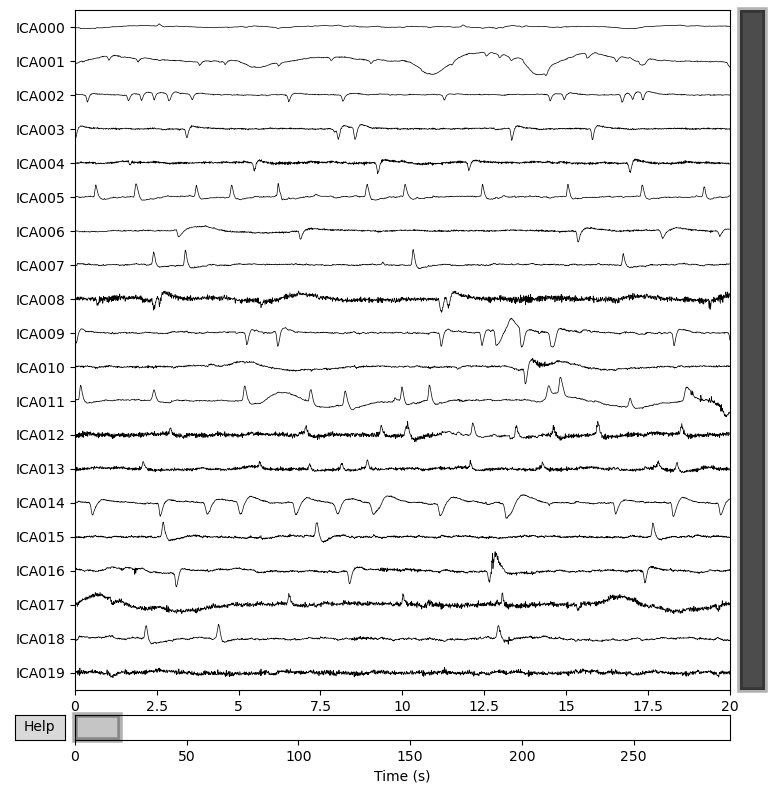

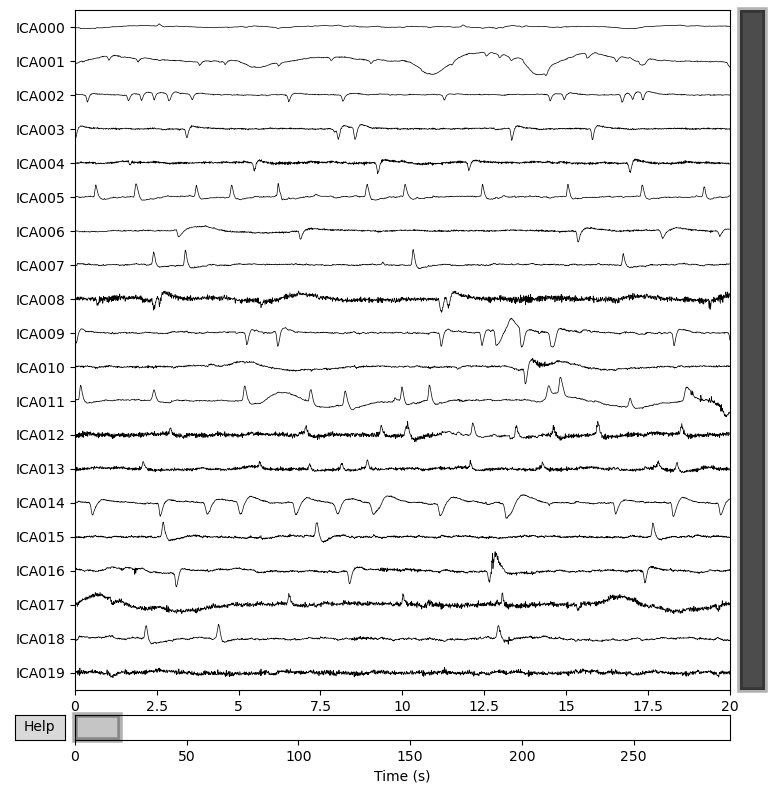

In [8]:
 ica.plot_sources(raw, block=False)

for component 0 blink are [3]


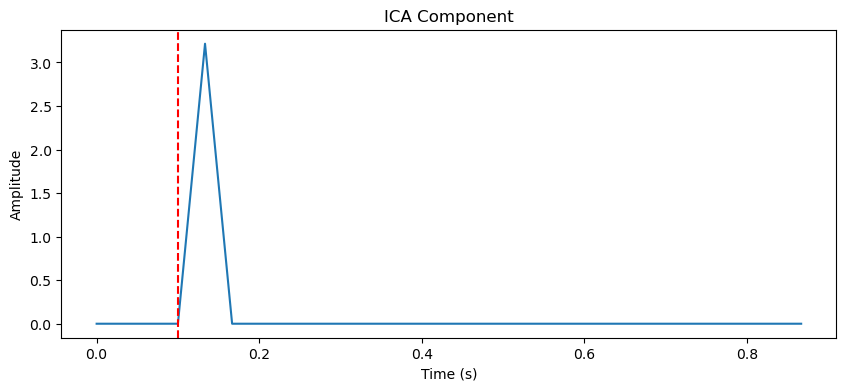

for component 1 blink are []


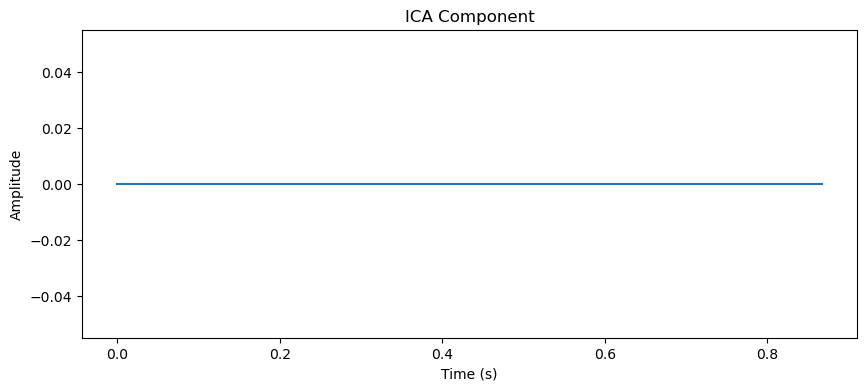

for component 2 blink are [3]


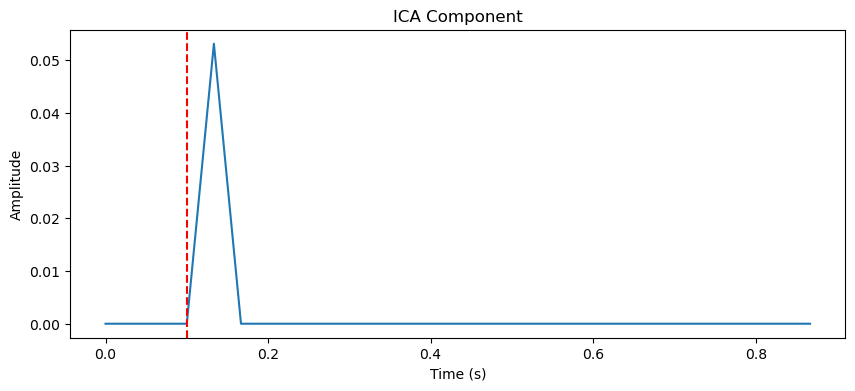

for component 3 blink are [3, 5]


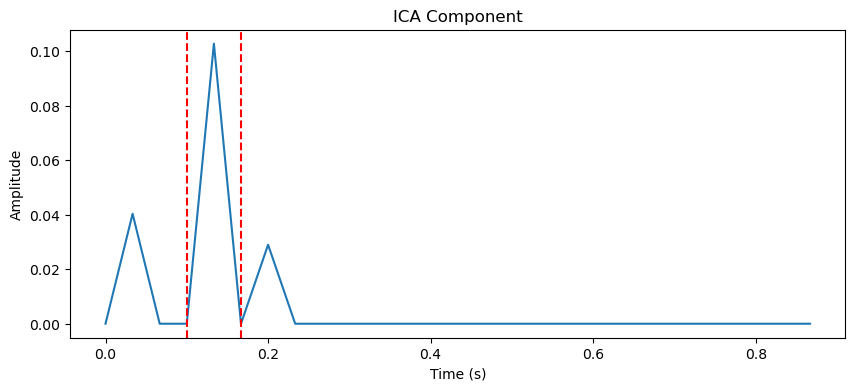

for component 4 blink are [4, 8, 19, 23]


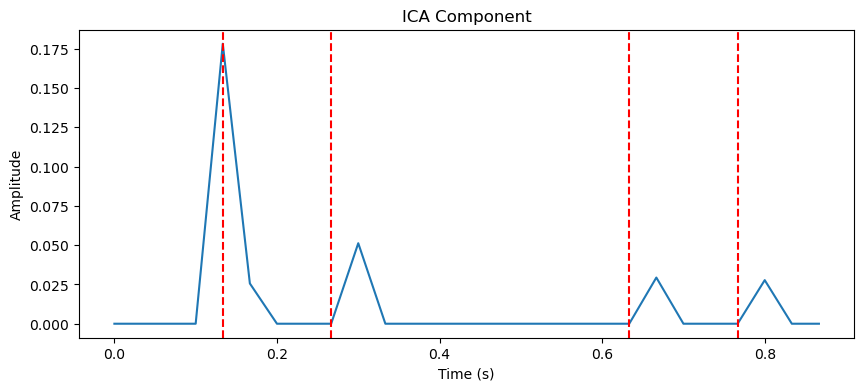

for component 5 blink are [3, 7, 17, 22]


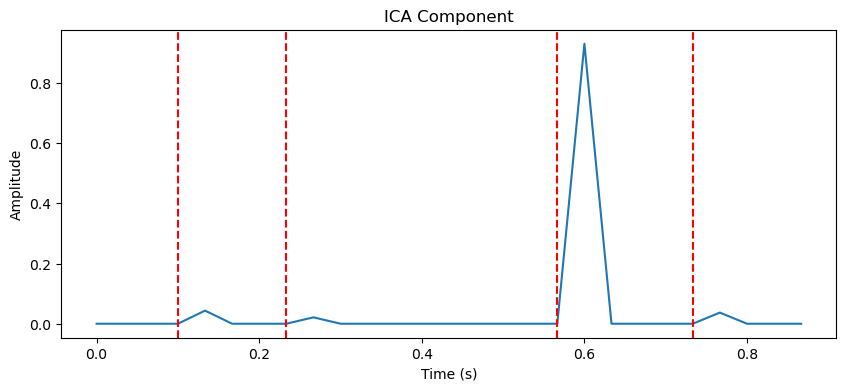

for component 6 blink are [16]


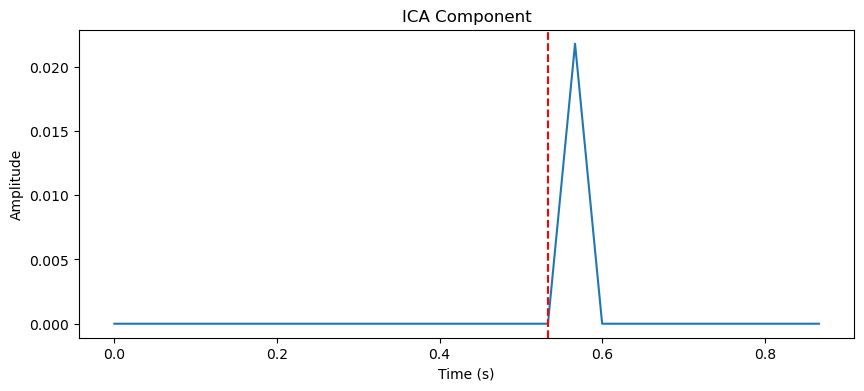

for component 7 blink are [9, 17, 21]


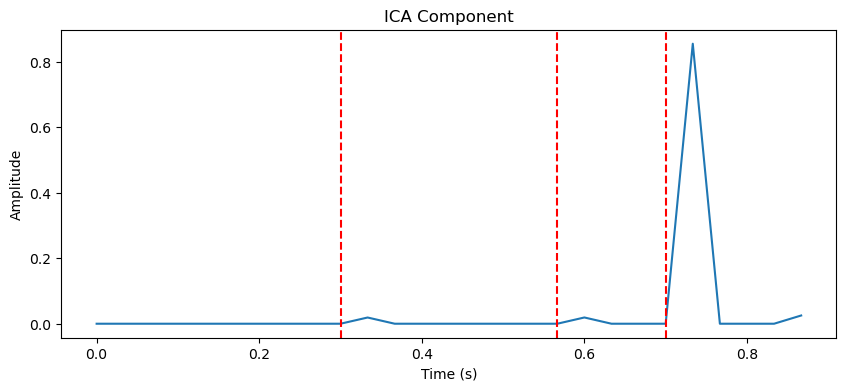

for component 8 blink are [4, 6]


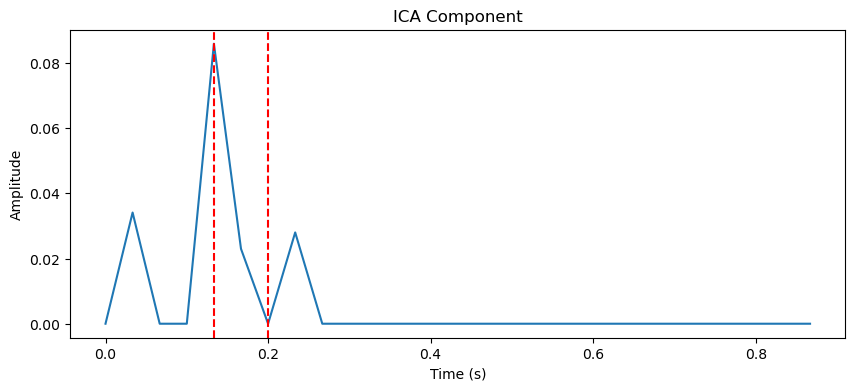

for component 9 blink are []


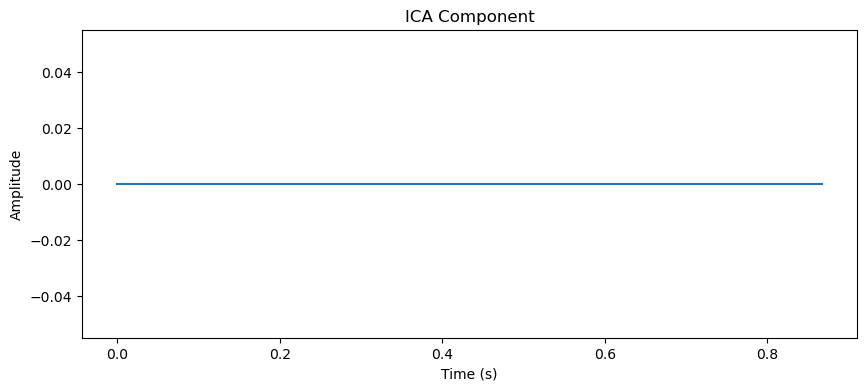

for component 10 blink are [3, 8, 23]


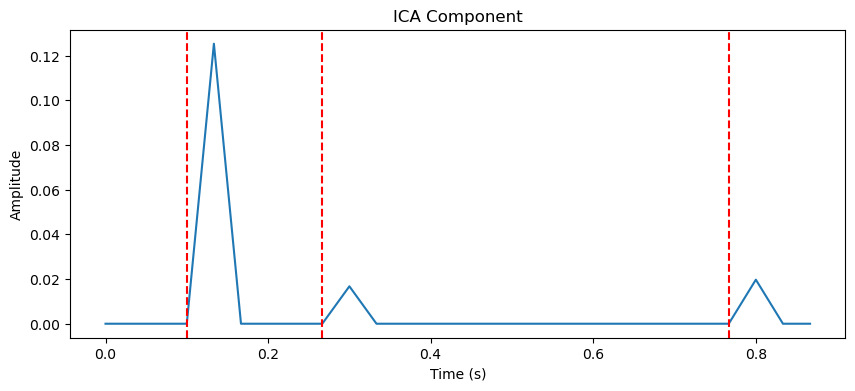

for component 11 blink are [1, 4, 6, 10, 16]


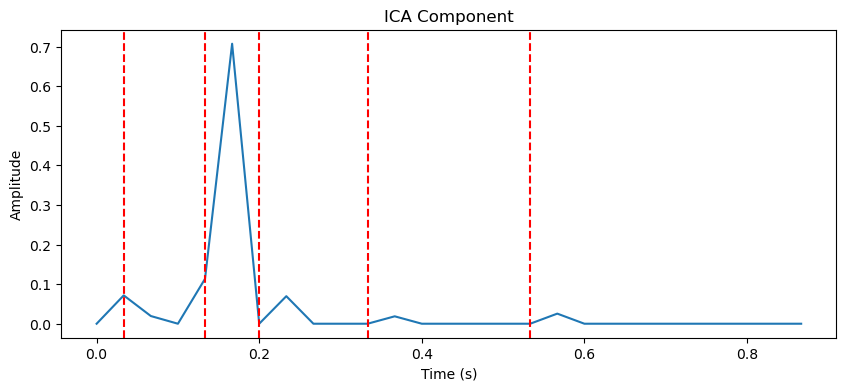

for component 12 blink are [3, 13, 18, 22]


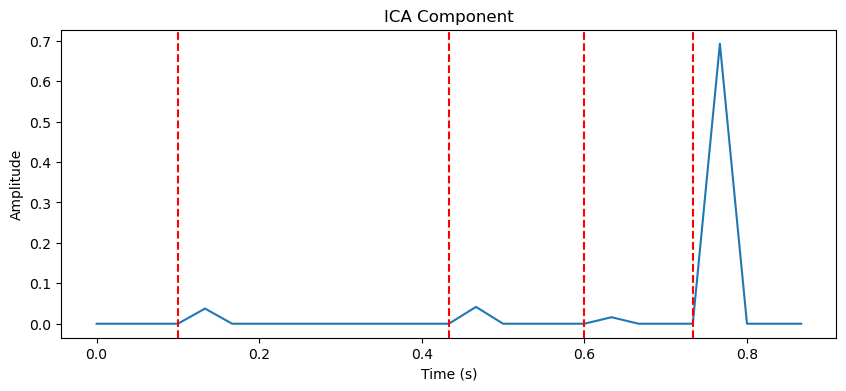

for component 13 blink are [1, 3, 8, 10]


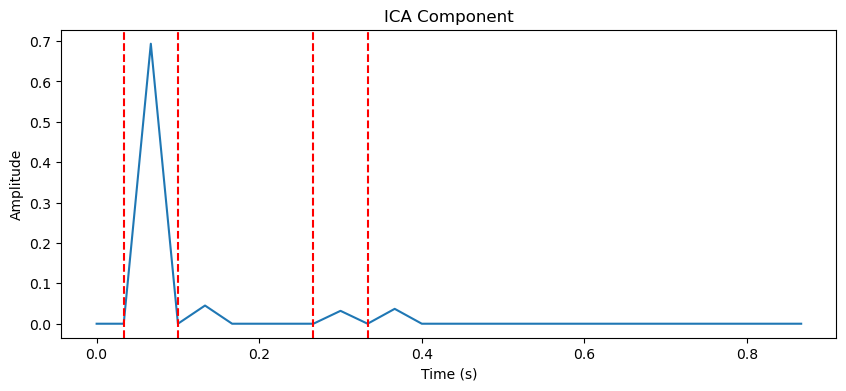

for component 14 blink are [3, 12]


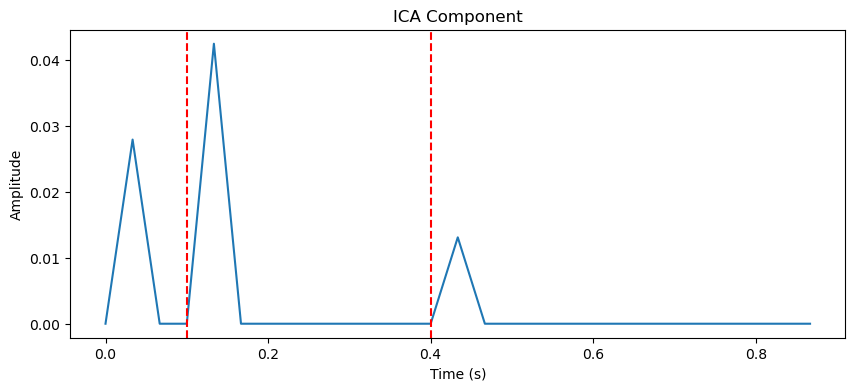

for component 15 blink are [3, 7, 9, 20]


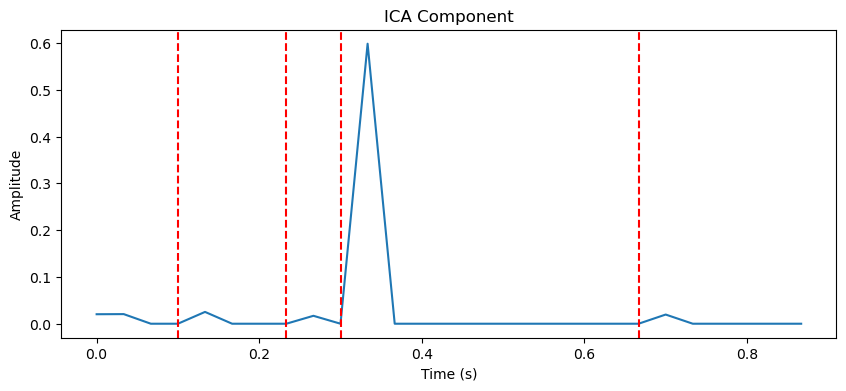

for component 16 blink are [4, 12, 16, 18, 24]


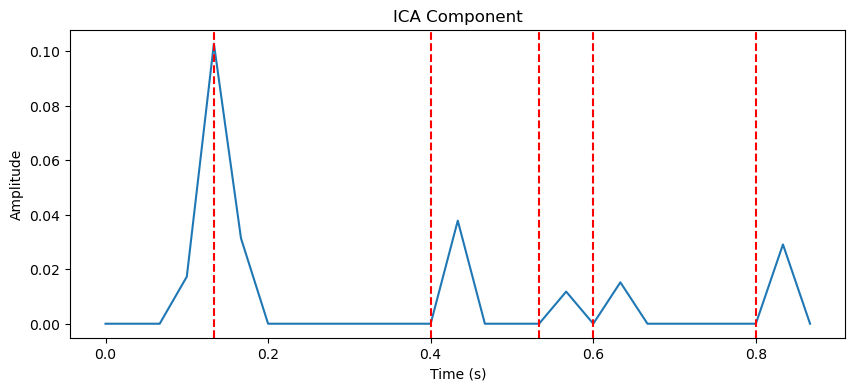

for component 17 blink are [3, 5, 15, 22]


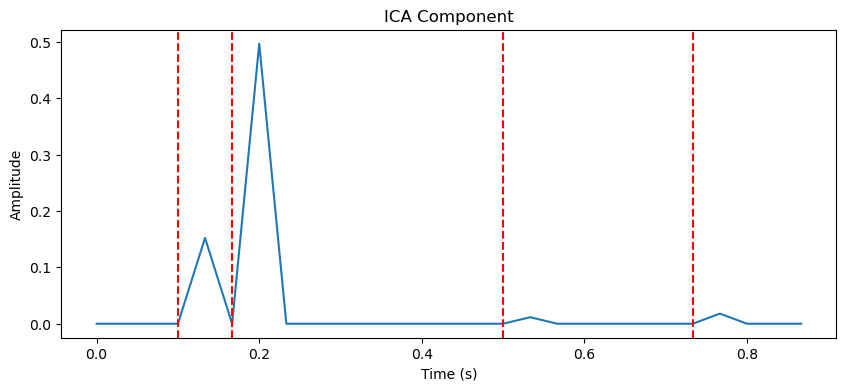

for component 18 blink are [5, 7, 9, 12, 21]


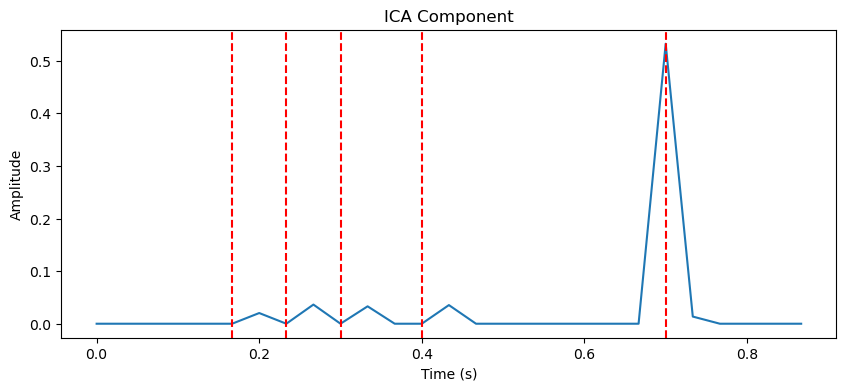

for component 19 blink are [3, 6, 13, 19]


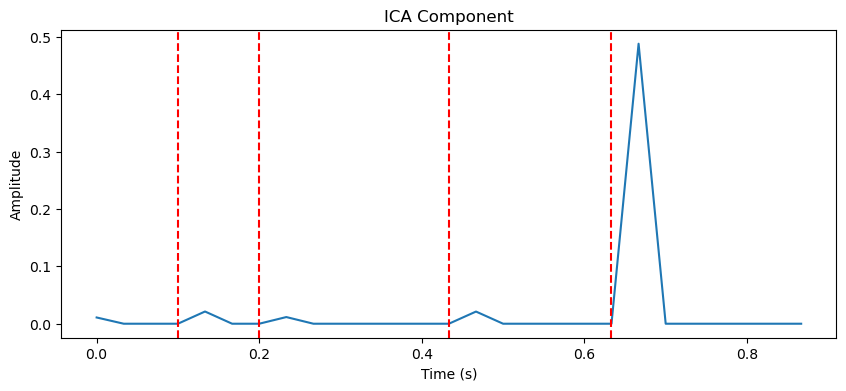

total number of blinks = 58


In [9]:
import numpy as np
from scipy.signal import find_peaks

def segment(y):
    """Extracts continuous segments of non-zero values from y."""
    s = np.concatenate(([0], np.flatnonzero(y), [len(y)]))
    return [y[s[i]:s[i+1]] for i in range(len(s)-1)], s

def blink_detection(y, fs):
    # Convert y to a NumPy array if it isn't already
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    
    """Detects blinks in a blink component y sampled at frequency fs."""
    lmin = fs // 50
    wmin = fs // 25
    wmax = fs
    
    # Calculate threshold as standard deviation of y
    threshold = 0.1* np.std(y)
    
    # Set all values below the threshold to zero
    y[y < threshold] = 0
    
    # Extract continuous segments of non-zero values from y
    Y, s = segment(y)
    #print("Y",Y)
    #print("s",s)
    t = []
    l = 0
    
    for j in range(len(Y)):
        N = len(Y[j])
        x = np.arange(N)
      
        # Find polynomial coefficients that fit Y[j]
        p = 3  # degree of polynomial
        X = np.vander(x, p+1)
       
        a = np.linalg.lstsq(X, Y[j], rcond=None)[0]
        
        # Compute the arc length of the fitted curve
       
        curve = np.polyval(a[::-1], x)
        try:
            alen = np.sum(np.sqrt(1 + np.gradient(curve)**2)) / N
        except ValueError:
            # Continue if an error occurs
            continue
        #print("j",j)   
        if wmin < N and N < wmax and lmin < alen:
            # Find the peak value and position within Y[j]
            #print("j",j)
            v = np.max(Y[j])
            p = np.argmax(Y[j])
            
            # Compute the angle between the peak and the ends of the curve
            alpha1 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], 0), p/fs)
            alpha2 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], N-1), (N-p-1)/fs)
            
            if alpha1 > 80 and alpha2 < 100:
                tl = s[j] + p - 1
                if(tl>0):
                    t.append(tl)
                    l += 1
    
    return t

b=0
e=0
fs = 30 # example sampling frequency
for i in range(ica.n_components_):
        component = ica.get_components()[:, i]
        blink_indices = blink_detection(component, fs)
        #b=b+sum(blink_indices)
        e=e+len(blink_indices)
        print("for component",i,"blink are",blink_indices)
        # Create a time axis based on the sampling frequency
        t = np.arange(len(component)) / fs
        # Plot the component signal
        plt.figure(figsize=(10, 4))
        plt.plot(t, component)
        plt.title('ICA Component')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        # Plot vertical lines at the times of the detected blinks
        for blink_index in blink_indices:
            plt.axvline(x=t[blink_index], color='r', linestyle='--')
    
        plt.show()
print("total number of blinks =",e)

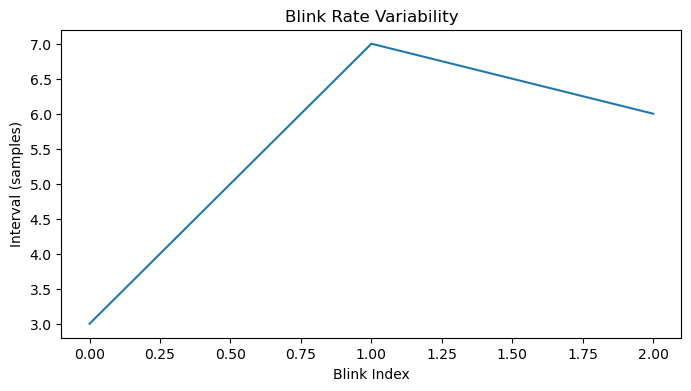

In [10]:
# Calculate blink rate variability
brv = []
for i in range(len(blink_indices)-1):
    brv.append(blink_indices[i+1] - blink_indices[i])

# Plot blink rate variability
plt.figure(figsize=(8, 4))
plt.plot(brv)
plt.title('Blink Rate Variability')
plt.xlabel('Blink Index')
plt.ylabel('Interval (samples)')
plt.show()


Effective window size : 0.105 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Dedu\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


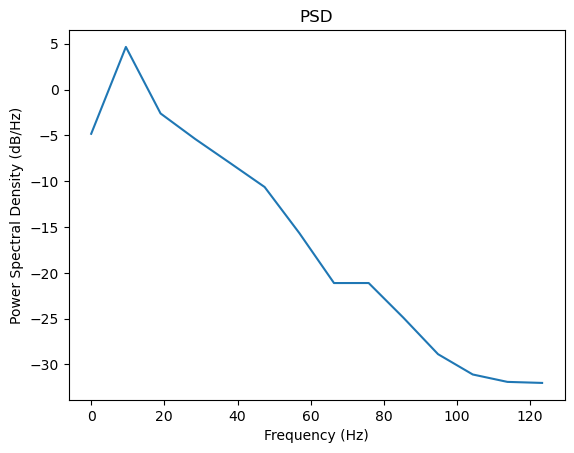

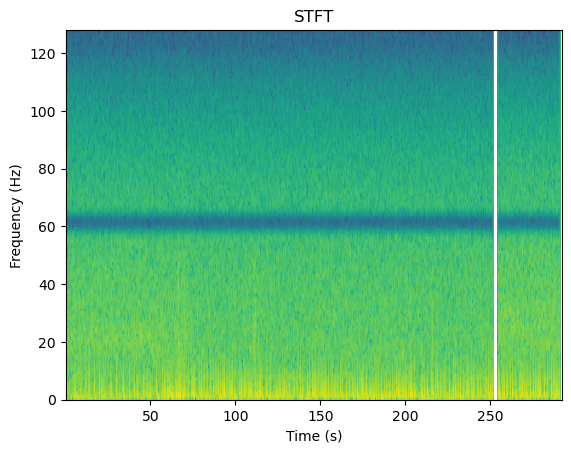

In [11]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 27
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

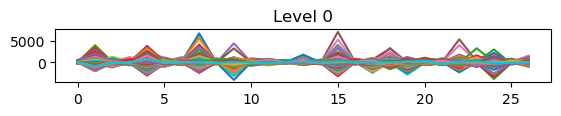

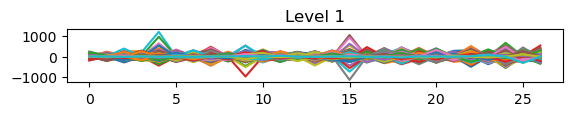

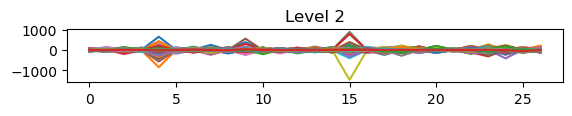

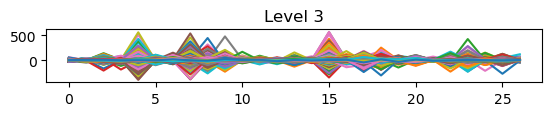

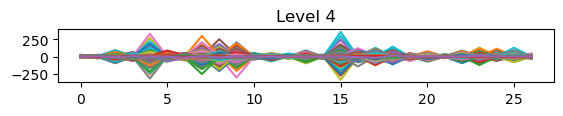

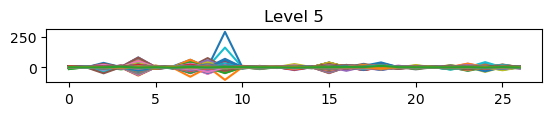

mean_spectrum: [1.00939368e+05 3.61976135e+03 4.99563461e+02 3.03381039e+02
 8.48519761e+01 3.83942631e+00]
var_spectrum: [4.37635696e+10 9.18583453e+06 1.40077996e+05 1.96261983e+05
 1.56839367e+04 2.34792320e+01]


In [12]:
import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data=raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

for remaing data apart from first 28 subjects.

In [13]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True) # replace inf values with NaNs
df2.dropna(inplace=True) # drop all rows with NaNs
data = df2.iloc[:, :-2].values
ch_names = ['Fp1']*23
# extract the data values and the channel names
ch_types = ['eeg']*23
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)
# create the raw object
raw = mne.io.RawArray(data, info)


Creating RawArray with float64 data, n_channels=23, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_26004\136696555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace([np.inf, -np.inf], np.nan, inplace=True) # replace inf values with NaNs
C:\Users\Dedu\AppData\Local\Temp\ipykernel_26004\136696555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True) # drop all rows with NaNs
C:\Users\Dedu\AppData\Local\Temp\ipykernel_26004\136696555.py:9: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
n_components = 20
ica = ICA(n_components=n_components, random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 20 components


C:\Users\Dedu\AppData\Local\Temp\ipykernel_26004\3602276034.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Fitting ICA took 0.4s.


Method,fastica
Fit,11 iterations on raw data (75000 samples)
ICA components,20
Available PCA components,23
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=20, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


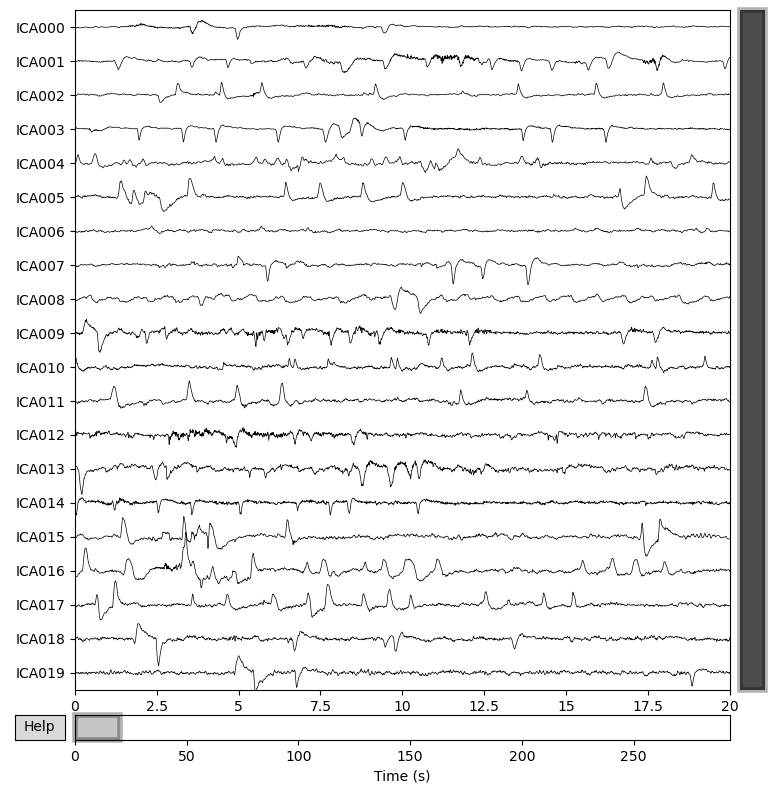

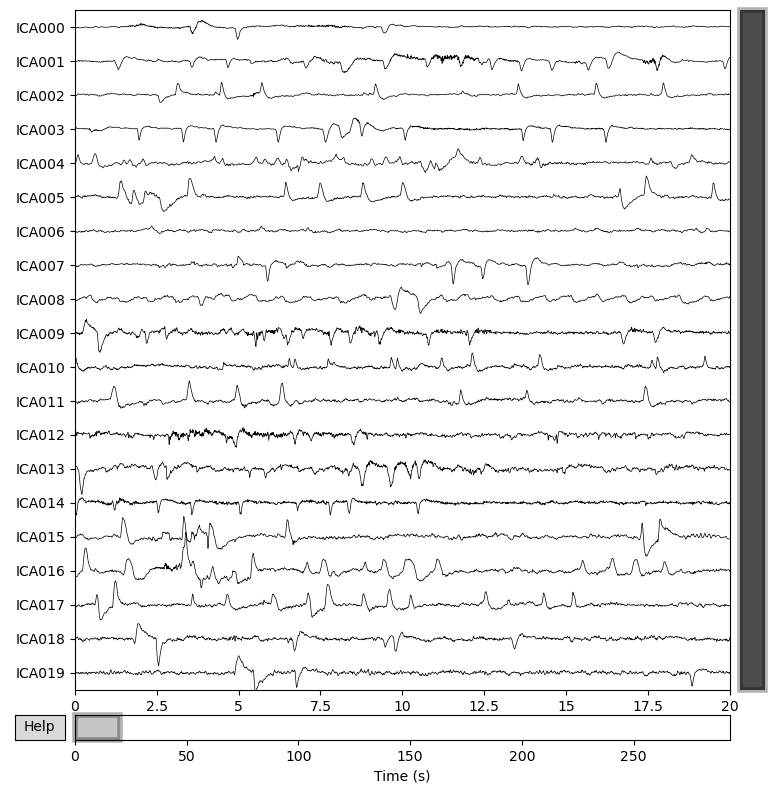

In [15]:
 ica.plot_sources(raw, block=False)

for component 0 blink are []


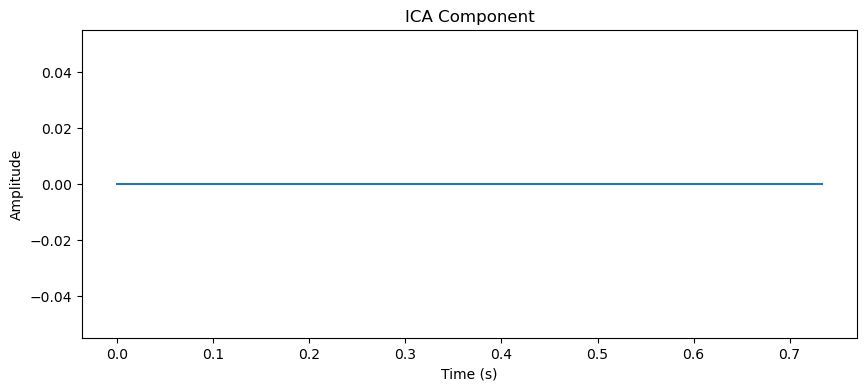

for component 1 blink are []


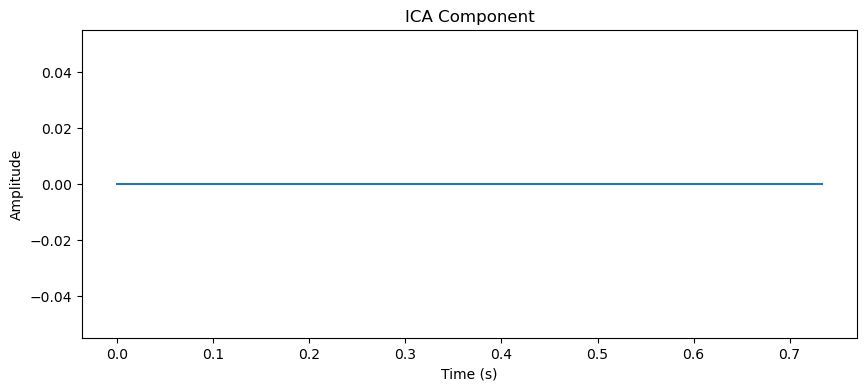

for component 2 blink are [1, 4, 9, 18]


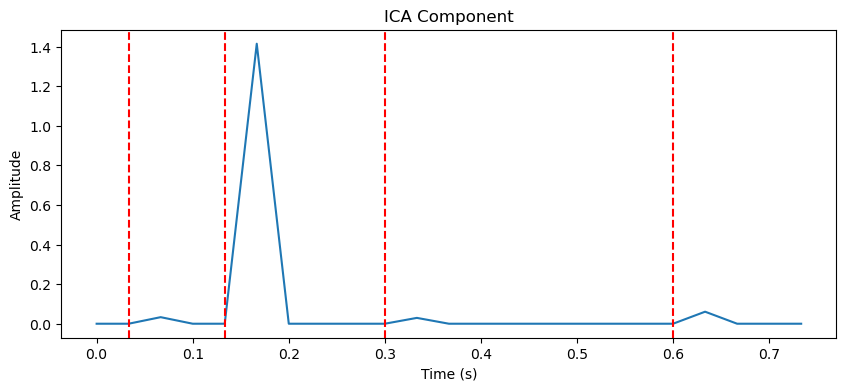

for component 3 blink are []


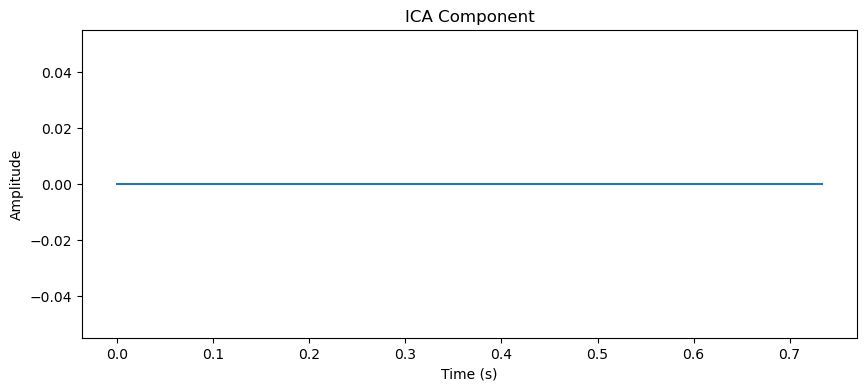

for component 4 blink are [5, 13, 20]


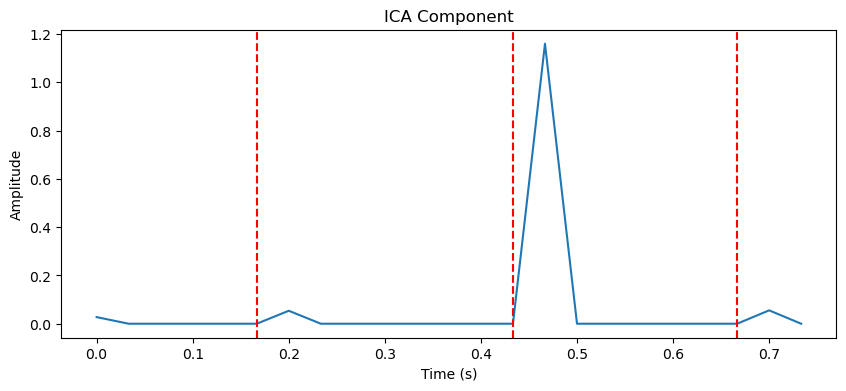

for component 5 blink are [8, 11, 13]


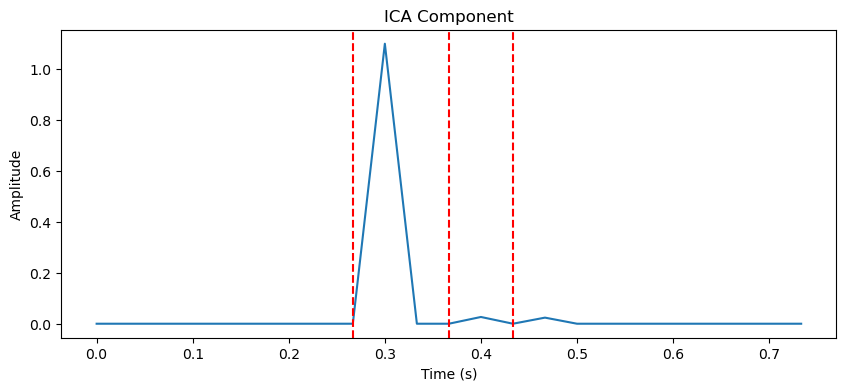

for component 6 blink are [3, 11, 19]


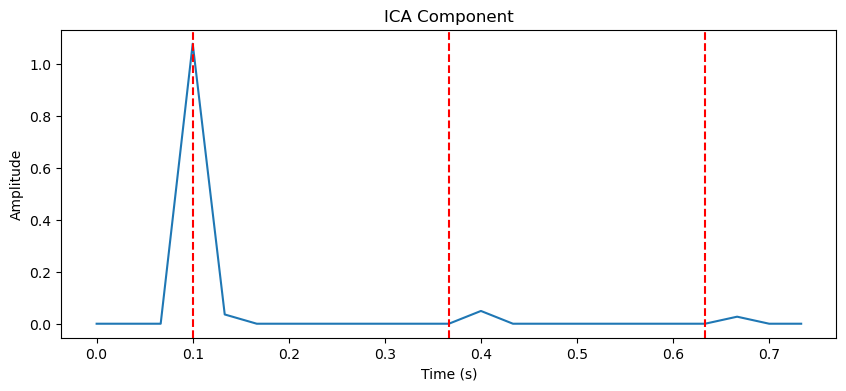

for component 7 blink are [13, 20]


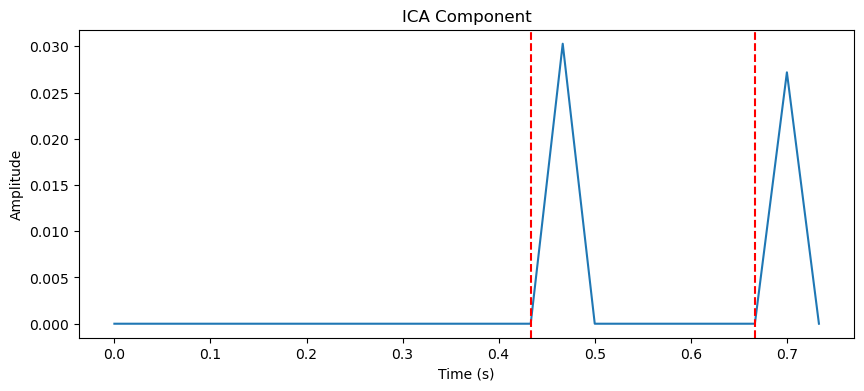

for component 8 blink are [16]


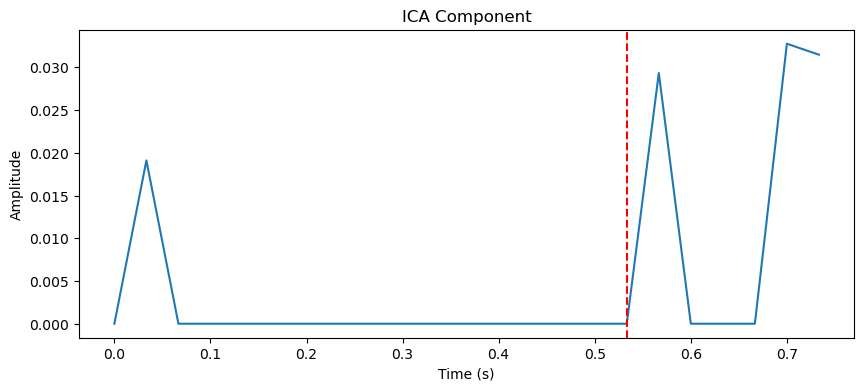

for component 9 blink are [11, 20]


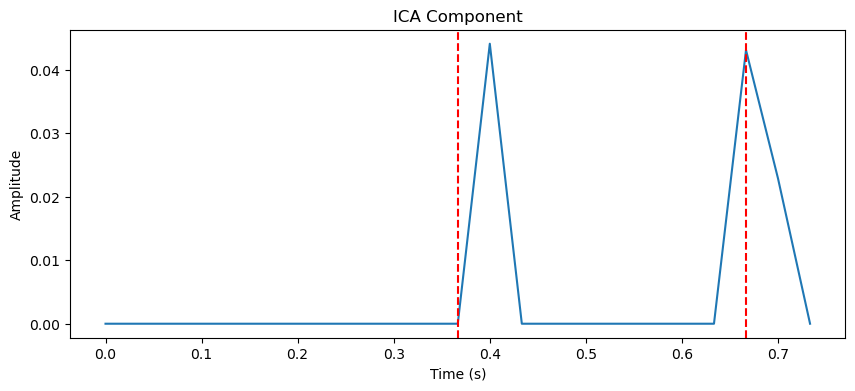

for component 10 blink are [4, 9, 19]


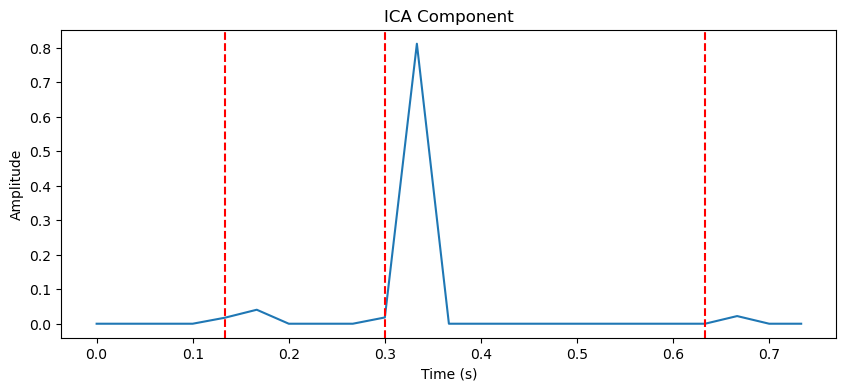

for component 11 blink are [5, 11, 20]


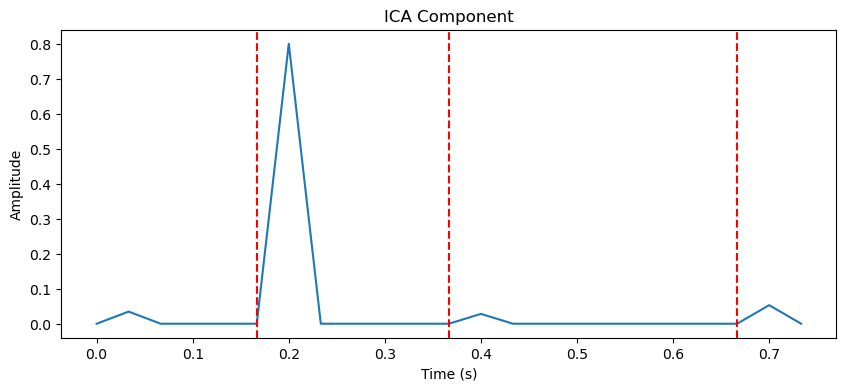

for component 12 blink are [3, 19]


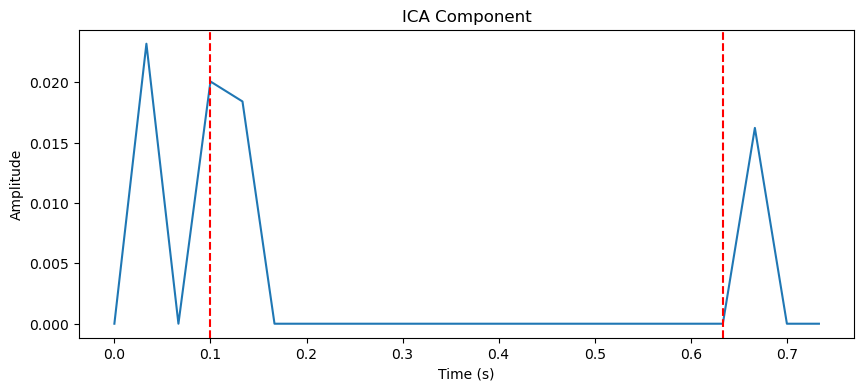

for component 13 blink are [11, 20]


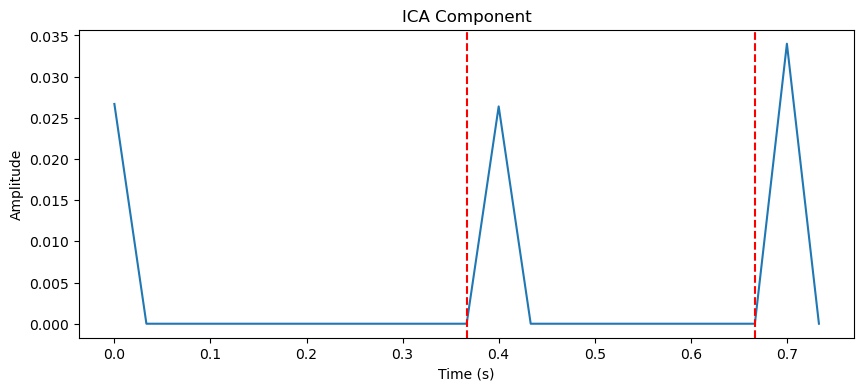

for component 14 blink are []


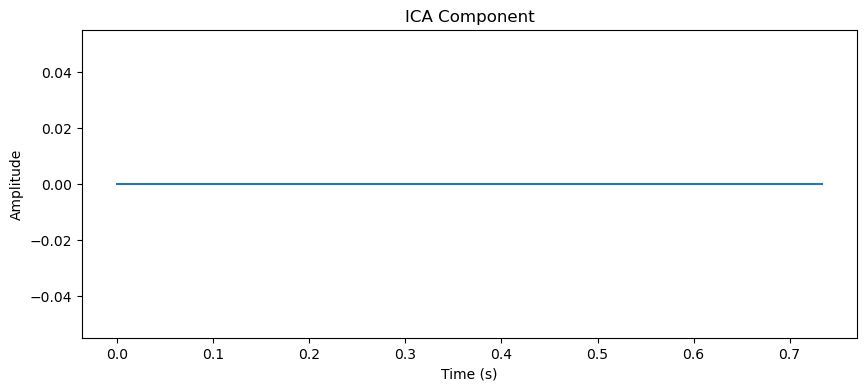

for component 15 blink are [3, 11, 14]


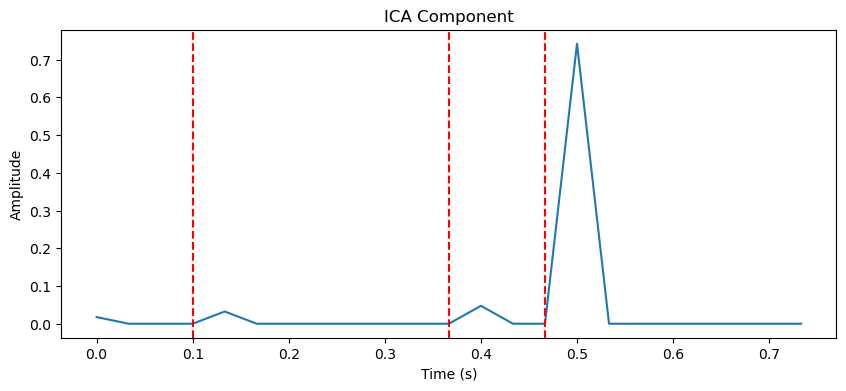

for component 16 blink are [11]


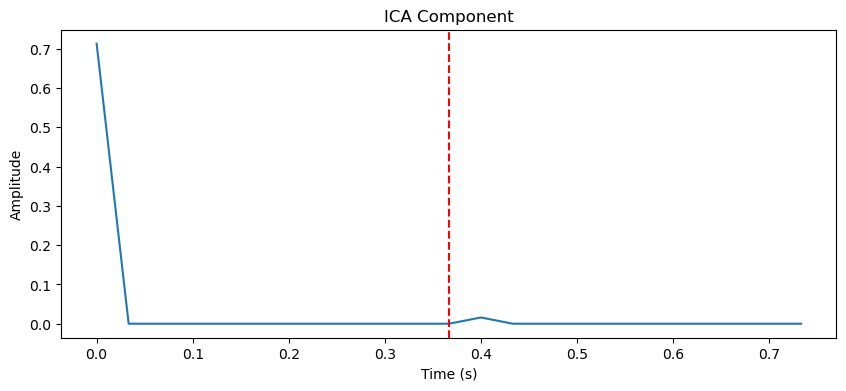

for component 17 blink are [9, 12, 19]


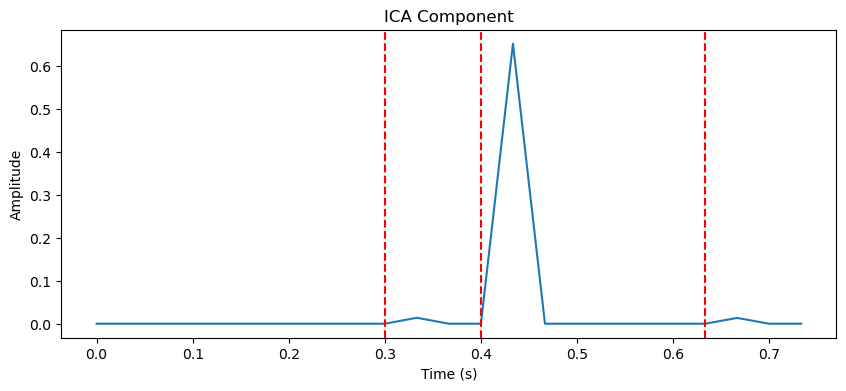

for component 18 blink are [3, 17, 20]


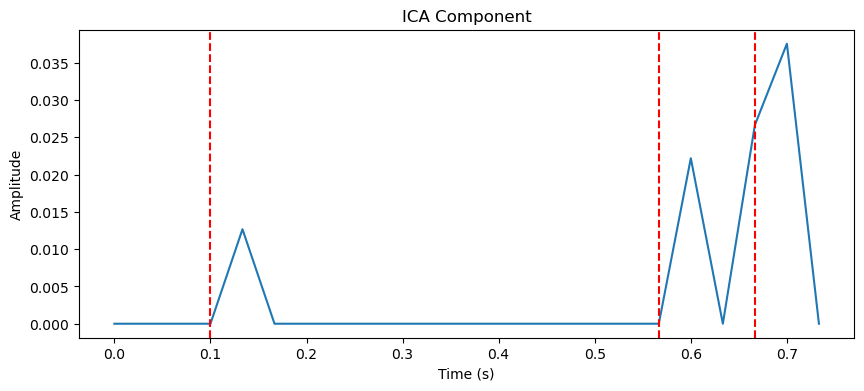

for component 19 blink are [5, 9, 12]


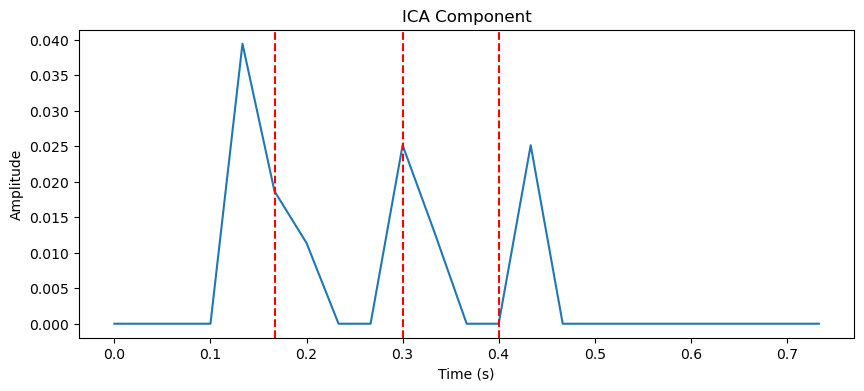

total number of blinks = 41


In [16]:
import numpy as np
from scipy.signal import find_peaks

def segment(y):
    """Extracts continuous segments of non-zero values from y."""
    s = np.concatenate(([0], np.flatnonzero(y), [len(y)]))
    return [y[s[i]:s[i+1]] for i in range(len(s)-1)], s

def blink_detection(y, fs):
    # Convert y to a NumPy array if it isn't already
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    
    """Detects blinks in a blink component y sampled at frequency fs."""
    lmin = fs // 50
    wmin = fs // 25
    wmax = fs
    
    # Calculate threshold as standard deviation of y
    threshold = 0.1* np.std(y)
    
    # Set all values below the threshold to zero
    y[y < threshold] = 0
    
    # Extract continuous segments of non-zero values from y
    Y, s = segment(y)
    #print("Y",Y)
    #print("s",s)
    t = []
    l = 0
    
    for j in range(len(Y)):
        N = len(Y[j])
        x = np.arange(N)
      
        # Find polynomial coefficients that fit Y[j]
        p = 3  # degree of polynomial
        X = np.vander(x, p+1)
       
        a = np.linalg.lstsq(X, Y[j], rcond=None)[0]
        
        # Compute the arc length of the fitted curve
       
        curve = np.polyval(a[::-1], x)
        try:
            alen = np.sum(np.sqrt(1 + np.gradient(curve)**2)) / N
        except ValueError:
            # Continue if an error occurs
            continue
        #print("j",j)   
        if wmin < N and N < wmax and lmin < alen:
            # Find the peak value and position within Y[j]
            #print("j",j)
            v = np.max(Y[j])
            p = np.argmax(Y[j])
            
            # Compute the angle between the peak and the ends of the curve
            alpha1 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], 0), p/fs)
            alpha2 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], N-1), (N-p-1)/fs)
            
            if alpha1 > 80 and alpha2 < 100:
                tl = s[j] + p - 1
                if(tl>0):
                    t.append(tl)
                    l += 1
    
    return t

b=0
e=0
fs = 30 # example sampling frequency
for i in range(ica.n_components_):
        component = ica.get_components()[:, i]
        blink_indices = blink_detection(component, fs)
        #b=b+sum(blink_indices)
        e=e+len(blink_indices)
        print("for component",i,"blink are",blink_indices)
        # Create a time axis based on the sampling frequency
        t = np.arange(len(component)) / fs
        # Plot the component signal
        plt.figure(figsize=(10, 4))
        plt.plot(t, component)
        plt.title('ICA Component')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        # Plot vertical lines at the times of the detected blinks
        for blink_index in blink_indices:
            plt.axvline(x=t[blink_index], color='r', linestyle='--')
    
        plt.show()
print("total number of blinks =",e)

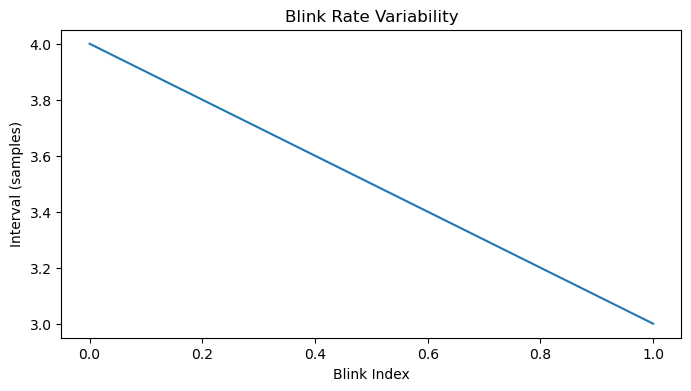

In [17]:
# Calculate blink rate variability
brv = []
for i in range(len(blink_indices)-1):
    brv.append(blink_indices[i+1] - blink_indices[i])

# Plot blink rate variability
plt.figure(figsize=(8, 4))
plt.plot(brv)
plt.title('Blink Rate Variability')
plt.xlabel('Blink Index')
plt.ylabel('Interval (samples)')
plt.show()


Effective window size : 0.090 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


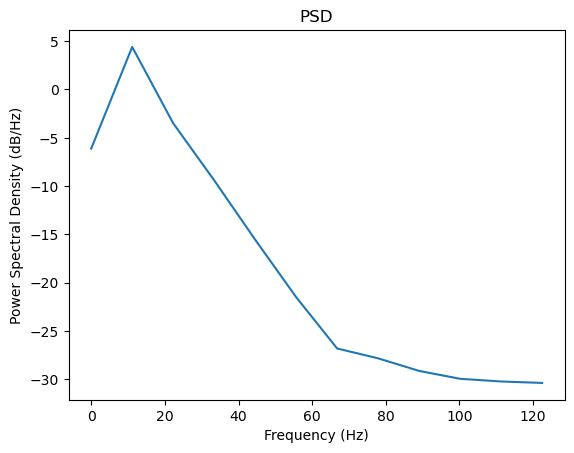

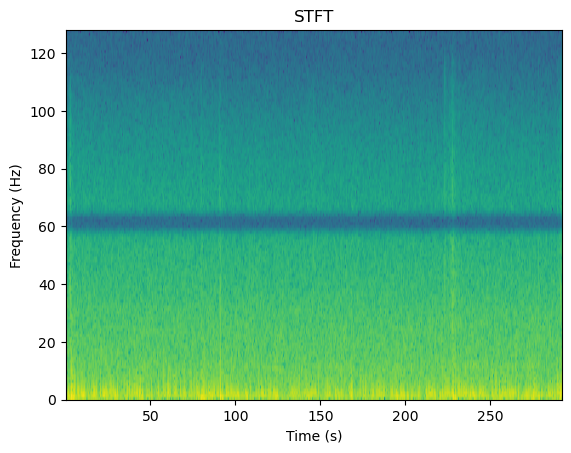

In [18]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 23
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

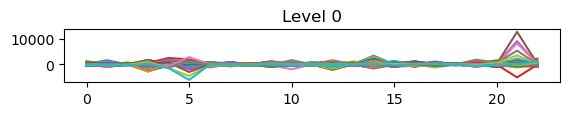

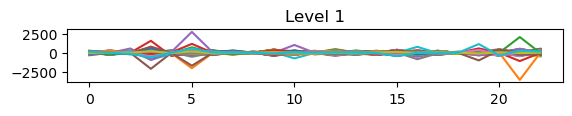

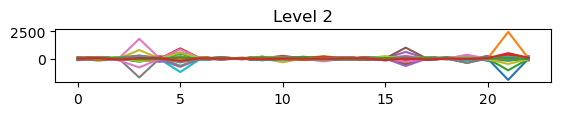

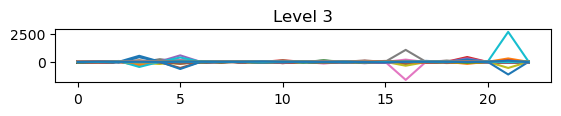

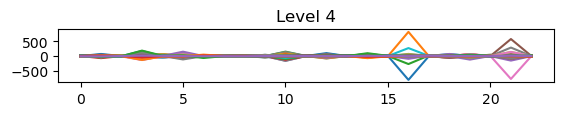

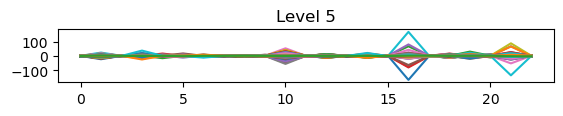

mean_spectrum: [4.40159930e+04 4.36915491e+03 6.63007377e+02 1.36145928e+02
 1.63374905e+01 5.66160265e-01]
var_spectrum: [2.13083034e+09 1.38919666e+07 4.37415536e+05 4.81831242e+04
 5.09455135e+02 5.46119844e-01]


In [19]:
import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data=raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)